In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [1]:
!pip install nbconvert

In [ ]:
data = pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':[1,2,3,4,5],
    'C':[1,1,1,1,1],
    'D':[0,0,0,0,0],
})

In [ ]:
data.head()

,A,B,C,D
0,1,1,1,0
1,2,2,1,0
2,3,3,1,0
3,4,4,1,0
4,5,5,1,0


# 1) Varience Threshold

*   **Varience Threshold** that removes all low-variance features.



In [ ]:
from sklearn.feature_selection import VarianceThreshold, f_

var_thr = VarianceThreshold(threshold=0.2)
var_thr.fit(data)

VarianceThreshold(threshold=0.2)

In [ ]:
cols = var_thr.get_support()

In [ ]:
~cols

array([False, False,  True,  True])

In [ ]:
a = set(data.columns)-set(data.columns[cols])
a

{'C', 'D'}

In [ ]:
# data.drop(a, axis=1, inplace=True)

In [ ]:
data.head()

,A,B,C,D
0,1,1,1,0
1,2,2,1,0
2,3,3,1,0
3,4,4,1,0
4,5,5,1,0


In [ ]:
var_thr.fit_transform(data)

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5]])

# 2) With Correlation

In [ ]:
from sklearn.datasets import load_boston
data_ = load_boston()


In [ ]:
X = pd.DataFrame(data_.data, columns=data_.feature_names)
y = pd.DataFrame(data_.target, columns=['out'])

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y.head()

,out
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [ ]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.205413,0.399643,-0.041852,0.402031,-0.210556,0.336697,-0.371149,0.622745,0.582164,0.296443,-0.304734,0.409681
ZN,-0.205413,1.000000,-0.544907,-0.031898,-0.527921,0.299282,-0.583271,0.672752,-0.318947,-0.306276,-0.375349,0.172134,-0.393315
INDUS,0.399643,-0.544907,1.000000,0.074533,0.764135,-0.407417,0.635749,-0.700550,0.579284,0.702541,0.362794,-0.333391,0.578976
CHAS,-0.041852,-0.031898,0.074533,1.000000,0.100199,0.139175,0.083140,-0.110392,0.047212,0.012041,-0.087582,0.071473,-0.103874
NOX,0.402031,-0.527921,0.764135,0.100199,1.000000,-0.305756,0.733034,-0.775599,0.595620,0.655932,0.169297,-0.339474,0.581960
RM,-0.210556,0.299282,-0.407417,0.139175,-0.305756,1.000000,-0.227609,0.217510,-0.219261,-0.296173,-0.345720,0.122512,-0.618609
AGE,0.336697,-0.583271,0.635749,0.083140,0.733034,-0.227609,1.000000,-0.753570,0.425143,0.475100,0.230440,-0.248012,0.550824
DIS,-0.371149,0.672752,-0.700550,-0.110392,-0.775599,0.217510,-0.753570,1.000000,-0.476497,-0.523633,-0.218248,0.269588,-0.474187
RAD,0.622745,-0.318947,0.579284,0.047212,0.595620,-0.219261,0.425143,-0.476497,1.000000,0.909381,0.481114,-0.403437,0.473225
TAX,0.582164,-0.306276,0.702541,0.012041,0.655932,-0.296173,0.475100,-0.523633,0.909381,1.000000,0.465101,-0.407992,0.525003


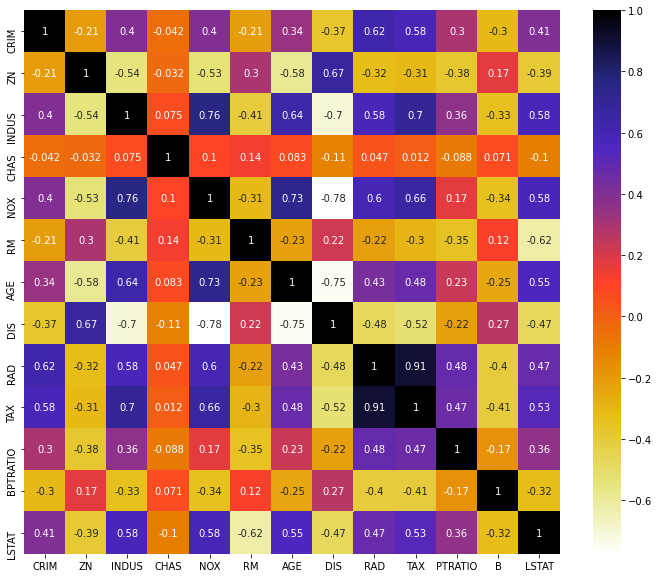

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def corr_ft(dataset, threshold):
  


SyntaxError: ignored

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)

In [ ]:
X.shape

(100, 100)

In [ ]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
fs

SelectKBest(k=10, score_func=<function f_regression at 0x7fb45032bc20>)

In [ ]:
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 10)


In [ ]:
fs.get_params()

{'k': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_regression>}

In [ ]:
fs.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(100, 2)


# 3) Mutual Information in Classification